<a href="https://colab.research.google.com/github/piyushpp07/DataScience/blob/main/completehomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agenda**

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## **How to Approach**

Gather knowledge about problem it's current solution and how it will be used by company and downstreams

First Task is to Frame the Problem by asking question's

**Question:** What exactly is the business objective?

This is important for performance measure to evaluate your model and time spend tweaking it.

Next Question is What's the current solution?

It will give a reference performance, as well as insights on how to solve the problem.
Select a Performance Measure
1. **RMSE:** It gives an idea of how much error the system typically makes in its predictions
2. **MAE:**Mean Absolute Error

RMSE = sqrt(sum((correct_value - predicted_value)^2)/number_of_samples)

MAE = 1/number_of_samples * sum(|correctValue - predictedValue|)

**Check the Assumptions**

My output is used by other machine.
Ask how downstream will use your output.
example exact price or label's(“cheap,”, “medium,” or “expensive”).

## **Import all the required packages**

1. Numpy is required for all mathematical computations
2. Pandas is required for manipulating data
3. Matplotlib and Seaborn will be required for drawing graphs and drawing conclusions from the given data. Hence, EDA (Exploratory Data Analysis)

In [146]:
import  numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Read the Data from the following link:
https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

2. View the actual format of the data and the various features and label

In [147]:
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [148]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S


Look at the Shape of the DataFrame, to get an idea about the total entries in the dataset

In [149]:
data.shape

(891, 12)

Now that we have a fair idea about the data, we need to look for the following things:
1. Try finding out the null values present in the data
2. See the data types of various features 


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now, if you can see the null values, trying finding the total sum of null values present for each feature. 

In [151]:
data.isna().sum()
df=data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Number of Null Values gives a good idea about what to do with the null values, but a graphical representation would give the impact of null values with respect to total data present. Try drawing a map of null values present

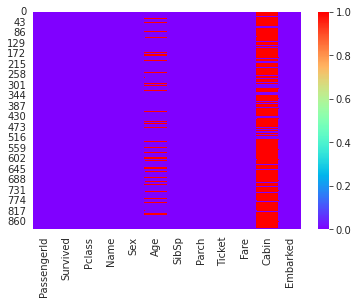

In [152]:
sns.heatmap(data=df.isna() , cmap = 'rainbow')

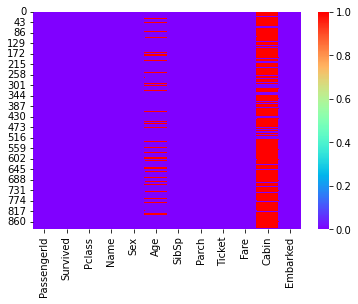

Now that we can see the null values, we need to first deal with numerical null values, there are a few options at our disposal, these are listed below:
1. Delete the entire row where null value is present.
2. Fill the null value with previous entry
3. Fill the null value with next entry
4. Fill the null value with mean, median or mode

The type of cleaning done on null values depends on our choice. This does not mean only these 4 values will be done when encountered with a null value. Though these are the most frequent ones, with respect to a numerical column containing a null value. 
This time we have to deal with 'Age', which means most appropriate thing would be the fill it with the mean value. 

This would also be clear if we make a graph, see the type of distribution, for various ages present in the data.

If you see a normal distribution, fill it with null values without giving much thought, as normal distribution, has max values near its mean

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


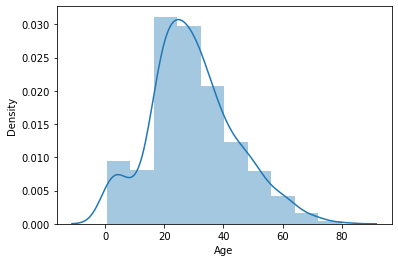

In [8]:
sns.distplot( df['Age'] , bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


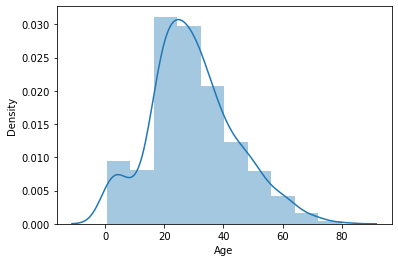

Now, that we are filling null values in Age feature with the mean Age, we need to find the mean age, this can be done, if we find the mean.
One way is the actually find the arithmetic mean, but that is tedious.
Try using the Describe Function, this would also give min, max, quatile values, which do not hold significance for this dataset, but could be very important for datasets where multiclass classification is required. 

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now that, we know the mean, store it in a variable where we will fill it later, 
also check if there are duplicate rows in the data.

All this is required so that we clean the data, which will make sure there are no absurd values in our model and prediction will be easy.

In [10]:
Age_fill = 30

In [11]:
df.duplicated().sum()

0

0

We can also check for correlations in the data, sometimes, there is high degree of correlation between the labels and the feature and hence, we can drop the feature which have little correlation as that will not impact our prediction significantly.

In [65]:
dm = df.drop(['Cabin','Name'],axis = 1)
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [ ]:
pd.get_dummies(dm['Embarked'])

In [67]:
from sklearn import preprocessing
oh = preprocessing.OneHotEncoder()
z=pd.get_dummies(dm['Sex'])
dm['male']=z['male']
dm=dm.drop('Sex',axis=1)

In [74]:
z=pd.get_dummies(dm['Embarked'])
dm['S']=z['S']
dm['Q']=z['Q']
dm=dm.drop(['Embarked','Ticket'],axis=1)

In [78]:
dm.corr()['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
Q              0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
S             -0.155660
Pclass        -0.338481
male          -0.543351
Name: Survived, dtype: float64

Survived       1.000000
Fare           0.257307
Parch          0.081629
Q              0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.070657
S             -0.149683
Pclass        -0.338481
male          -0.543351
Name: Survived, dtype: float64

Now, we are performing EDA,i.e., Exploratory Data Analysis. 
So we need to know what each feature is signifying and also how much importance it will carry when we prepare our model.

Firstly, we know that our label is which person survived. 
Now in our training data, we need to know exactly, how many people survived, so that we know about the greater percentage in our data.
This means we must know whether more people survived in our training data or whether more people did not survive in our training data.

We can use function for counting all of them, but generally graphs are preferred in EDA, simply due to visual appeal, people process images quickly when compared to raw numbers, hence try using graphs, as much as possible.

In [81]:
q=dm['Survived']
q

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [82]:
dm['Survived'].sum()

342

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


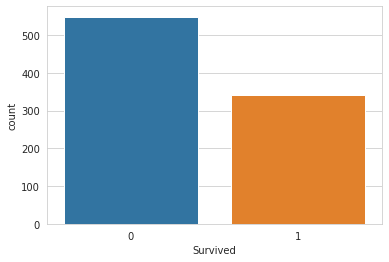

In [83]:
sns.set_style('whitegrid')
sns.countplot( dm['Survived'])

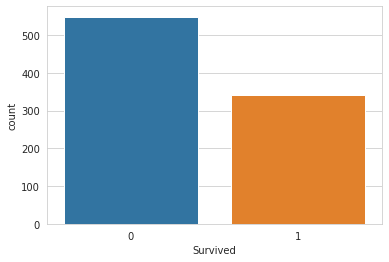

Now that we know the number of Survived people, we also need to know their variations when sex is accounted, this means we want to know how many men were their among the survived ones, because during a calamity such as the sinking of Titanic, women, children and elderly are the ones which will be saved first, but the mean age on the ship being 30, sex should be the first parameter which we look for and check it. 

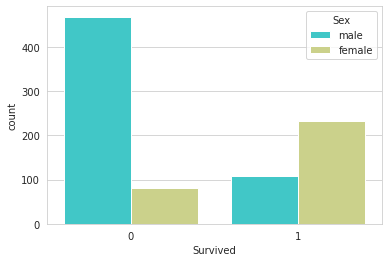

In [85]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue="Sex",palette = 'rainbow',data=df)

Appart from Sex, Rich people will get to survive, so we need to find rich or poor, among the survived ones. One thing to note here is that we do not have an income feature, so we try to find something that relates it, Passenger class could be a good idea, as Rich People will buy better Cabins. 
Cabin could have been used, but firstly it is a categorical data which does not represent anything where we could deduce, moreover it has a high amount of null Values


Fare is also a good parameter to judge economy but we have no idea about the price range for each class, so it would lead to a random selection of arbitrary fare, therefore we find the Passenger class bought by survived people. 

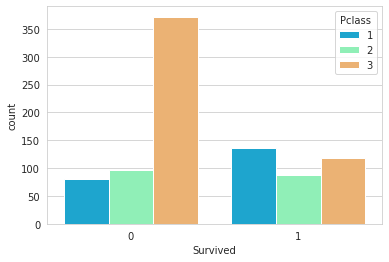

In [86]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue="Pclass",palette = 'rainbow',data=df)

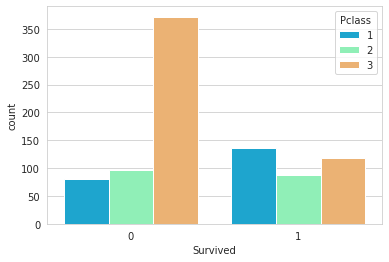

We should also look for number of people travelling with parents, siblings and spouse as, one would try to save their family first, and a rough idea would help us select the type of model which needs to be prepared. 

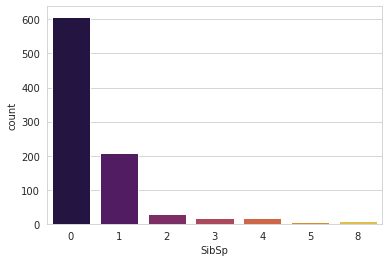

In [89]:
sns.countplot(x="SibSp",palette = 'inferno',data=df )

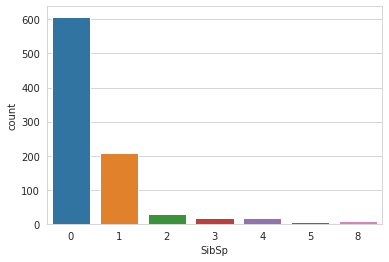

Now that we looked at each paremeters, lets look at the number of people that bought a certain type of ticket, like say there is a ticket priced 20$, getting to know the number of people which bought that ticket will help me know, the percentage economy of people on board 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


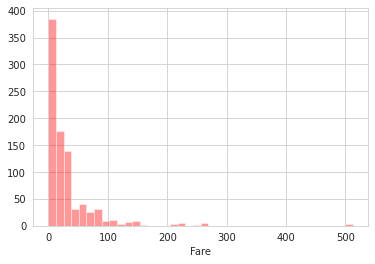

In [90]:
sns.distplot(df['Fare'],kde=False , color="r", bins = 40)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


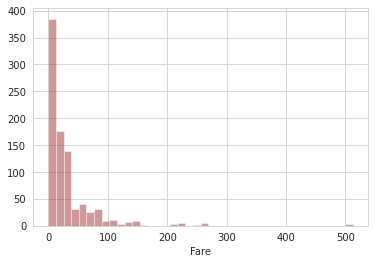

One, thing which we can see is, we needed to access each feature and see its relation with my label, i.e, Survived. This might not be needed if we see high correlation among the features and label. 

Now that, we know about the data present, lets clean the null values here and prepare our model

First fill the mean age to clean that data and see the info to check whether the null value has been accounted for. 

In [96]:
m=dm['Age'].mean()
dm['Age']=dm['Age'].fillna(30)
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
 8   S            891 non-null    uint8  
 9   Q            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


One can also check a heatmap, to see the same, as we know, maps and graphs are preferred due to visual conclusions.

In [97]:
m=df['Age'].mean()
df['Age']=df['Age'].fillna(30)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


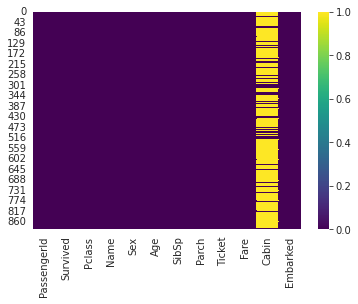

In [98]:
sns.heatmap( df.isna(), cmap = 'viridis')

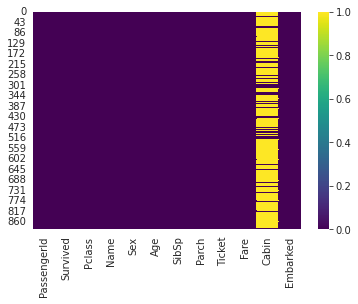

We can also notice, there are huge amount of null values present in the cabin features

Firstly, cabin is not a very significant parameter, moreover, if we fill these many null values, there will be mostly predicted values and might not lead to desired results.

Another thing of importance, is there are 2 null values in the feature 'Embarked', this feature represents where did the person boarded the ship, here firstly it is categorical value, secondly this parameter could be filled with the most frequently occuring value

First try to make a plot to see the most frequently occuring value, and then fill the data with this value.

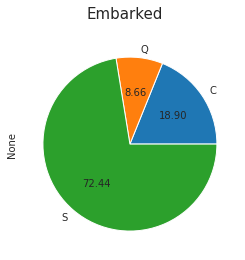

In [382]:
df.groupby(['Embarked']).size().plot(kind='pie', autopct='%.2f')
plt.suptitle('Embarked', fontsize=15)
plt.show()

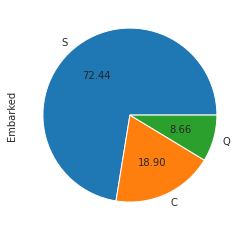

In [128]:
df['Embarked']=df['Embarked'].fillna('S')
df=df.drop('Cabin',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


One can try and check the information, to see the null values, if remaining.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


We can see that there are certain categorical values remaining in our data, we also know that our models do not work well with categorical values, hence we need to convert them to numerical values, of some sort.

One Hot Encoding, Ordinal Encoding is a good method to do that, but here only 2 or 3 parameters are present hence, get_dummies of pandas would not only prove simpler but also quicker.

So, convert embarked and sex, the remaining categorical values, into form of 1 and 0

In [133]:
embk = pd.get_dummies(df['Embarked'])
sex = pd.get_dummies(df['Sex'])
#df=df.drop(['Name','Ticket'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Now, Name and Ticket will not affect whether the person survives or not, hence we can drop them as these are categorical features and cannot be converted into numerical data due to each value being unique. 
Sex and Embarked can be encoded and hence should be dropped as encoded parameters, will be added to the dataframe. 

In [138]:
trail=df
oh = preprocessing.OneHotEncoder()
z=oh.fit_transform(trail[['Sex']]).toarray()
z2=oh.fit_transform(trail[['Embarked']]).toarray()

In [141]:
z2

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Now, add the encoded values to the main dataframe

This now makes our data clean and ready for training it appropriately. 

In [ ]:
df = pd.concat([ ??? , ??? , ???], axis = 1)

You can also see the dataframe into the current format to check whether its converted appropriately. 
We have not dropped PassengerId, even though it will not affect our prediction, this is because, we need to associate the predictions with a feature, where no mathematical computations will be done.

In [135]:
dm.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,S,Q
0,1,0,3,22.0,1,0,7.2500,1,1,0
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,1,1,0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Separate the features and labels, into x and y so that we can train our features, in order to predict the labels accordingly. 

In [283]:
y = dm['Survived']

In [284]:
x = dm.drop(['Survived'],axis=1)

Now that my features are recorded separately, I need to scale the features, so that all my data, in within close quarters, as we can see that fare and age will not be a close value, so we need to perform preprocessing, and scale the value within close quarters, this will be done using, Standard Scaler. 

In [285]:
import numpy as np
from sklearn import preprocessing

In [304]:
scaler = preprocessing.StandardScaler()


Now the entire data is ready to be split into testing and training, splitting the data is necessary, to check the accuracies of our model. 
While splitting the features, use the scaled values


In [305]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

lin.fit(x,y)

y_pred = lin.predict(x)


In [306]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
mse = np.sqrt(mse)
mse

0.3771828933340224

In [274]:
lin.predict([[2	,	2 ,	38.0	 ,1	,0	,71.2833	,0	,0	,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.75568567])

In [308]:
 scaler = preprocessing.StandardScaler()
 x=scaler.fit_transform(x)

In [309]:
x.shape,y.shape

((891, 9), (891,))

In [310]:
y=y.reshape(-1,1)

In [329]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.5)

Initially, we can use various models, to train and predict the data. 
Initially try, Linear Regression, fit and predict the data, find score and see the accuracy of that algorithm 

In [330]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [331]:
x_val.shape, y_train.shape

((446, 9), (445, 1))

In [332]:
y_pred = lin_reg.predict(x_val)

In [333]:
y_pred.shape, y_train.shape

((446, 1), (445, 1))

Try, finding mean square error, to calculate for accuracies in the model. 

In [334]:
import numpy as np
from sklearn.metrics import mean_squared_error

titanic_predictions = lin_reg.predict(x_val)
lin_mse = mean_squared_error(y_val, titanic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.37338613213060257

Upon getting the mean square error, we can see the linear regression algorithm is not the best for this data, we can try using another model, lets say, Decision Tree


In [335]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [336]:
titanic_predictions = tree_reg.predict(x_val)

tree_mse =  mean_squared_error(y_val, titanic_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.47114020648890026

0.5147090179259814

Error has increased a bit, we can try using cross validation and see the score for both Decision Tree and Linear Regression 

In [356]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,x,y,scoring=None, cv=10)
tree_rmse_scores = np.sqrt(scores)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [357]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [       nan        nan        nan        nan 0.50977962        nan
 0.36444549        nan 0.4957446  0.47899606]
Mean: nan
Standard deviation: nan


Scores: [0.54916965 0.48795004 0.47140452 0.52363494 0.52363494 0.52363494
 0.47519096 0.52363494 0.52363494 0.38100038]
Mean: 0.4982890239385851
Standard deviation: 0.04573918669920912


In [351]:
lin_scores = cross_val_score(lin, x_val,y_val,scoring=None, cv=10)

lin_rmse_scores = np.sqrt(lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.688925   0.76678917 0.39937719 0.58071049 0.62729827 0.58304695
 0.14974763 0.75748624 0.65725156 0.54119095]
Mean: 0.5751823457192098
Standard deviation: 0.1747817710761369


Scores: [0.42003696 0.43644627 0.30901733 0.33445102 0.39309775 0.44419382
 0.40806583 0.40214738 0.3919156  0.31250529]
Mean: 0.3851877257092825
Standard deviation: 0.046798904400201013


Both of the above algorithms are not the best for this dataset, we may try various algorithms and try increasing the accuracy, but Random Forrest is generally known to be the best, so maybe try that.

Though the general practice is to try other before coming at Random Forest. 

In [361]:
from sklearn.ensemble  import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x_train,y_train)

titanic_predictions =forest_reg.predict(x_val)

forest_mse = mean_squared_error(y_val, titanic_predictions)
forest_rmse = np.sqrt(tree_mse)
forest_rmse

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.47114020648890026

0.3797912820358674

In [362]:
display_scores(forest_rmse)

Scores: 0.47114020648890026
Mean: 0.47114020648890026
Standard deviation: 0.0


Scores: 0.3797912820358674
Mean: 0.3797912820358674
Standard deviation: 0.0


After looking at these scores we might perform GridSearchCV, in order to check the best suited params from the data. 


In [368]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV( forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score= True )

grid_search.fit(x_train, x_train)
print(grid_search.best_params_)

{'max_features': 8, 'n_estimators': 30}


{'max_features': 4, 'n_estimators': 30}


After finding the best params, we can find all mean params and check that best params gives the least error

In [369]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.5087072007336296 {'max_features': 2, 'n_estimators': 3}
0.409550712750973 {'max_features': 2, 'n_estimators': 10}
0.4002105044254282 {'max_features': 2, 'n_estimators': 30}
0.4739735168480818 {'max_features': 4, 'n_estimators': 3}
0.3864877315015922 {'max_features': 4, 'n_estimators': 10}
0.36182085255062735 {'max_features': 4, 'n_estimators': 30}
0.43746402739627965 {'max_features': 6, 'n_estimators': 3}
0.3676439731986432 {'max_features': 6, 'n_estimators': 10}
0.3475032095917112 {'max_features': 6, 'n_estimators': 30}
0.41492129636128483 {'max_features': 8, 'n_estimators': 3}
0.3679888273902388 {'max_features': 8, 'n_estimators': 10}
0.33730569256985804 {'max_features': 8, 'n_estimators': 30}
0.47843215062907707 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.38433121415853433 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4304543719764156 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3604490997187679 {'bootstrap': False, 'max_features': 

0.41676686967165943 {'max_features': 2, 'n_estimators': 3}
0.39519925558242547 {'max_features': 2, 'n_estimators': 10}
0.37939355494532345 {'max_features': 2, 'n_estimators': 30}
0.41117368505675816 {'max_features': 4, 'n_estimators': 3}
0.3912585153149406 {'max_features': 4, 'n_estimators': 10}
0.3867315295985874 {'max_features': 4, 'n_estimators': 30}
0.4355559212930949 {'max_features': 6, 'n_estimators': 3}
0.4032327431661401 {'max_features': 6, 'n_estimators': 10}
0.3855958662161859 {'max_features': 6, 'n_estimators': 30}
0.4372609433924867 {'max_features': 8, 'n_estimators': 3}
0.3977215754933383 {'max_features': 8, 'n_estimators': 10}
0.38453574857935363 {'max_features': 8, 'n_estimators': 30}
0.432523643872749 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3963781185979188 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.43059182411701197 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.4113505686425882 {'bootstrap': False, 'max_features': 